# Checking Your Network

Selecting which rates to include and which to exclude from your network is a bit of an art.  pynucastro has a few tools to help check what you might be missing.

In [1]:
import pynucastro as pyna

In [2]:
reaclib_library = pyna.ReacLibLibrary()

## `RateCollection` validate method

Let's start by trying to create a network for carbon burning.

To start, let's pick the nuclei $\alpha$, ${}^{12}\mathrm{C}$ and ${}^{20}\mathrm{Ne}$

In [3]:
nuclei = ["he4", "c12", "ne20"]
cburn_library = reaclib_library.linking_nuclei(nuclei)

Now we can make a rate collection

In [4]:
rc = pyna.RateCollection(libraries=[cburn_library])
rc

C12 ⟶ 3 He4
2 C12 ⟶ He4 + Ne20
Ne20 + He4 ⟶ 2 C12
3 He4 ⟶ C12 + 𝛾

Now, since we are primarily interested in ${}^{12}\mathrm{C} + {}^{12}\mathrm{C}$, let's make sure we are not missing any other reactions that have the same reactants.  The `validate()` method will do this, by comparing the rates we have selected to another library.

In [5]:
rc.validate(reaclib_library)

validation: Ne20 produced in 2 C12 ⟶ He4 + Ne20 never consumed.


validation: missing 3 He4 ⟶ p + B11 as alternative to 3 He4 ⟶ C12 + 𝛾 (Q = -8.682 MeV).
validation: missing 3 He4 ⟶ n + C11 as alternative to 3 He4 ⟶ C12 + 𝛾 (Q = -11.4466 MeV).
validation: missing 2 C12 ⟶ p + Na23 as alternative to 2 C12 ⟶ He4 + Ne20 (Q = 2.242 MeV).
validation: missing 2 C12 ⟶ n + Mg23 as alternative to 2 C12 ⟶ He4 + Ne20 (Q = -2.598 MeV).


False

This tells us that we are missing 2 branches of the ${}^{12}\mathrm{C} + {}^{12}\mathrm{C}$ reaction.  ReacLib already scales the rates based on the branching of the products, so we should try to include these other branches.

```{note}
By default, `validate()` only checks forward rates.
```

To address these issues, we need to include the additional nuclei.  In particular, the branch that makes ${}^{23}\mathrm{Na}$ is likely important (the rate making ${}^{23}\mathrm{Mg}$ is endothermic, so less likely).

In [6]:
nuclei += ["p", "na23"]
cburn_library = reaclib_library.linking_nuclei(nuclei)
rc = pyna.RateCollection(libraries=[cburn_library])
rc

C12 ⟶ 3 He4
2 C12 ⟶ p + Na23
2 C12 ⟶ He4 + Ne20
Ne20 + He4 ⟶ p + Na23
Ne20 + He4 ⟶ 2 C12
Na23 + p ⟶ He4 + Ne20
Na23 + p ⟶ 2 C12
3 He4 ⟶ C12 + 𝛾

In [7]:
rc.validate(reaclib_library)

validation: Ne20 produced in 2 C12 ⟶ He4 + Ne20 never consumed.
validation: Ne20 produced in Na23 + p ⟶ He4 + Ne20 never consumed.


validation: missing 3 He4 ⟶ p + B11 as alternative to 3 He4 ⟶ C12 + 𝛾 (Q = -8.682 MeV).
validation: missing 3 He4 ⟶ n + C11 as alternative to 3 He4 ⟶ C12 + 𝛾 (Q = -11.4466 MeV).
validation: missing 2 C12 ⟶ n + Mg23 as alternative to 2 C12 ⟶ He4 + Ne20 (Q = -2.598 MeV).
validation: missing 2 C12 ⟶ n + Mg23 as alternative to 2 C12 ⟶ p + Na23 (Q = -2.598 MeV).
validation: missing Na23 + p ⟶ n + Mg23 as alternative to Na23 + p ⟶ He4 + Ne20 (Q = -4.839 MeV).
validation: missing Na23 + p ⟶ Mg24 + 𝛾 as alternative to Na23 + p ⟶ He4 + Ne20 (Q = 11.6927 MeV).


False

Now, looking at what is missing, we probably want to include ${}^{24}\mathrm{Mg}$ as an endpoint for carbon burning.

In [8]:
nuclei += ["mg24"]
cburn_library = reaclib_library.linking_nuclei(nuclei)
rc = pyna.RateCollection(libraries=[cburn_library])
rc

Mg24 ⟶ p + Na23
Mg24 ⟶ He4 + Ne20
C12 ⟶ 3 He4
Ne20 + He4 ⟶ Mg24 + 𝛾
Na23 + p ⟶ Mg24 + 𝛾
2 C12 ⟶ p + Na23
2 C12 ⟶ He4 + Ne20
Ne20 + He4 ⟶ p + Na23
Ne20 + He4 ⟶ 2 C12
Na23 + p ⟶ He4 + Ne20
Na23 + p ⟶ 2 C12
3 He4 ⟶ C12 + 𝛾

In [9]:
rc.validate(reaclib_library)

validation: Mg24 produced in Ne20 + He4 ⟶ Mg24 + 𝛾 never consumed.
validation: Mg24 produced in Na23 + p ⟶ Mg24 + 𝛾 never consumed.


validation: missing 3 He4 ⟶ p + B11 as alternative to 3 He4 ⟶ C12 + 𝛾 (Q = -8.682 MeV).
validation: missing 3 He4 ⟶ n + C11 as alternative to 3 He4 ⟶ C12 + 𝛾 (Q = -11.4466 MeV).
validation: missing 2 C12 ⟶ n + Mg23 as alternative to 2 C12 ⟶ He4 + Ne20 (Q = -2.598 MeV).
validation: missing 2 C12 ⟶ n + Mg23 as alternative to 2 C12 ⟶ p + Na23 (Q = -2.598 MeV).
validation: missing Ne20 + He4 ⟶ n + Mg23 as alternative to Ne20 + He4 ⟶ Mg24 + 𝛾 (Q = -7.21457 MeV).
validation: missing Na23 + p ⟶ n + Mg23 as alternative to Na23 + p ⟶ He4 + Ne20 (Q = -4.839 MeV).
validation: missing Na23 + p ⟶ n + Mg23 as alternative to Na23 + p ⟶ Mg24 + 𝛾 (Q = -4.839 MeV).


False

This now seems reasonable.  The reactions that are missing are all endothermic.

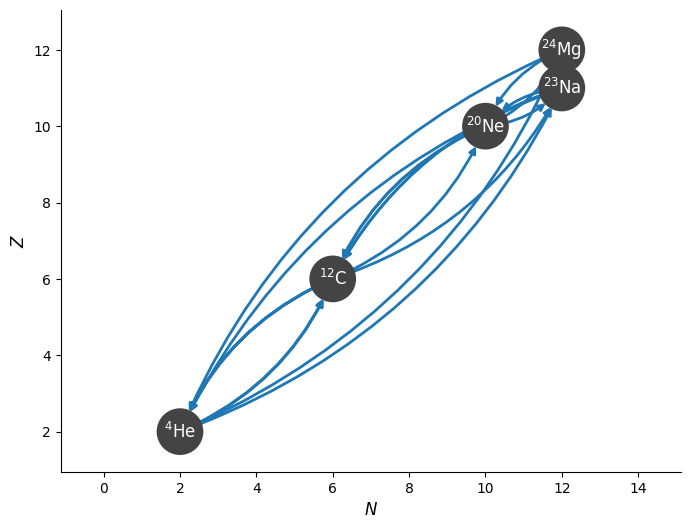

In [10]:
fig = rc.plot(curved_edges=True)